# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | udachny
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | petukhovo
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | san antonio de pale
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | tahe
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | melegnano
Processing Record 16 of Set 1 | san ignacio
Processing Record 17 of Set 1 | nar'yan-mar
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | flying 

Processing Record 38 of Set 4 | veraval
Processing Record 39 of Set 4 | trenggalek
Processing Record 40 of Set 4 | vilyuchinsk
Processing Record 41 of Set 4 | phan rang-thap cham
Processing Record 42 of Set 4 | cozumel
Processing Record 43 of Set 4 | howard springs
Processing Record 44 of Set 4 | yeed
Processing Record 45 of Set 4 | aasiaat
Processing Record 46 of Set 4 | guiuan
Processing Record 47 of Set 4 | qaqortoq
Processing Record 48 of Set 4 | kiruna
Processing Record 49 of Set 4 | beberibe
Processing Record 0 of Set 5 | oroqen zizhiqi
Processing Record 1 of Set 5 | birobidzhan
Processing Record 2 of Set 5 | olonkinbyen
Processing Record 3 of Set 5 | nemuro
Processing Record 4 of Set 5 | ghadamis
Processing Record 5 of Set 5 | qal'at bishah
City not found. Skipping...
Processing Record 6 of Set 5 | coquimbo
Processing Record 7 of Set 5 | taoudenni
Processing Record 8 of Set 5 | nova xavantina
Processing Record 9 of Set 5 | ust-tsilma
Processing Record 10 of Set 5 | rocha
Process

Processing Record 28 of Set 8 | luorong
Processing Record 29 of Set 8 | bodmin
Processing Record 30 of Set 8 | grand falls-windsor
Processing Record 31 of Set 8 | calvinia
Processing Record 32 of Set 8 | poso
Processing Record 33 of Set 8 | ribeira brava
Processing Record 34 of Set 8 | belmonte
Processing Record 35 of Set 8 | bhuma
City not found. Skipping...
Processing Record 36 of Set 8 | lastoursville
Processing Record 37 of Set 8 | changping
Processing Record 38 of Set 8 | laojunmiao
Processing Record 39 of Set 8 | saipan
Processing Record 40 of Set 8 | katsuura
Processing Record 41 of Set 8 | lodwar
Processing Record 42 of Set 8 | santa ana
Processing Record 43 of Set 8 | igarka
Processing Record 44 of Set 8 | byron bay
Processing Record 45 of Set 8 | filey
Processing Record 46 of Set 8 | cannonvale
Processing Record 47 of Set 8 | rosarito
Processing Record 48 of Set 8 | sisimiut
Processing Record 49 of Set 8 | portland
Processing Record 0 of Set 9 | la foa
Processing Record 1 of 

Processing Record 19 of Set 12 | zacualtipan
Processing Record 20 of Set 12 | vallenar
Processing Record 21 of Set 12 | tangalle
Processing Record 22 of Set 12 | bokovskaya
Processing Record 23 of Set 12 | mathba
Processing Record 24 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 25 of Set 12 | blairgowrie
Processing Record 26 of Set 12 | al ghayzah
Processing Record 27 of Set 12 | merizo village
Processing Record 28 of Set 12 | saint johns
Processing Record 29 of Set 12 | ippy
Processing Record 30 of Set 12 | oualidia
City not found. Skipping...
Processing Record 31 of Set 12 | bubaque
Processing Record 32 of Set 12 | inhambane
Processing Record 33 of Set 12 | pyay
Processing Record 34 of Set 12 | nangomba
Processing Record 35 of Set 12 | jinka
Processing Record 36 of Set 12 | ypsonas
Processing Record 37 of Set 12 | luba
Processing Record 38 of Set 12 | seagoville
Processing Record 39 of Set 12 | corinto
Processing Record 40 of Set 12 | kokkola
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,udachny,66.4167,112.4000,-29.58,100,98,1.13,RU,1706643912
1,edinburgh of the seven seas,-37.0676,-12.3116,14.56,60,50,5.93,SH,1706643913
2,college,64.8569,-147.8028,-27.03,66,75,0.00,US,1706643913
3,port-aux-francais,-49.3500,70.2167,3.91,73,79,14.47,TF,1706643914
4,west island,-12.1568,96.8225,26.99,78,40,2.57,CC,1706643914


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,-29.58,100,98,1.13,RU,1706643912
1,edinburgh of the seven seas,-37.0676,-12.3116,14.56,60,50,5.93,SH,1706643913
2,college,64.8569,-147.8028,-27.03,66,75,0.00,US,1706643913
3,port-aux-francais,-49.3500,70.2167,3.91,73,79,14.47,TF,1706643914
4,west island,-12.1568,96.8225,26.99,78,40,2.57,CC,1706643914


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

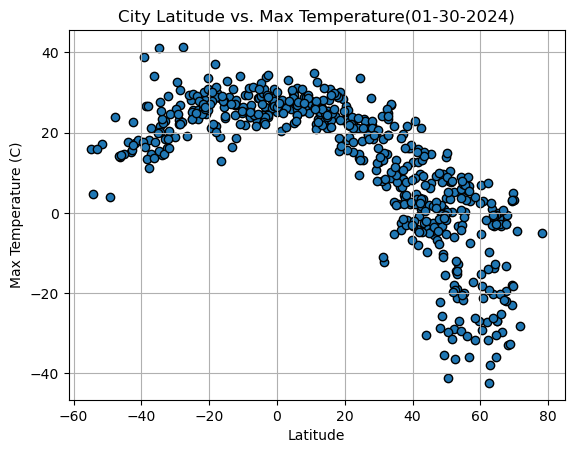

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
#datetime.today() and .strftime functions taken from StackOverflow: https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
from datetime import datetime
date = datetime.today().strftime('%m-%d-%Y')
plt.title(f"City Latitude vs. Max Temperature({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

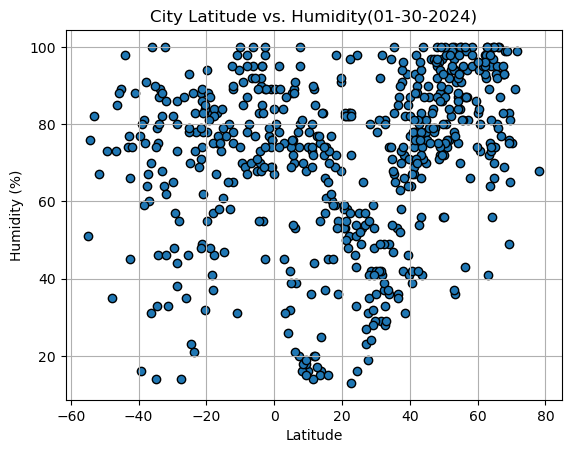

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
#datetime.today() and .strftime functions taken from StackOverflow: https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
from datetime import datetime
date = datetime.today().strftime('%m-%d-%Y')
plt.title(f"City Latitude vs. Humidity({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

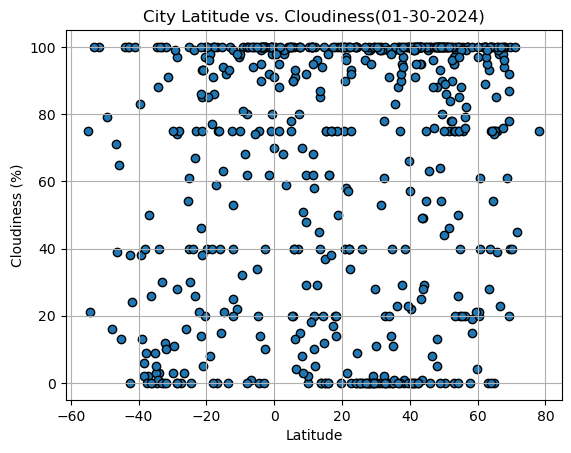

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
#datetime.today() and .strftime functions taken from StackOverflow: https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
from datetime import datetime
date = datetime.today().strftime('%m-%d-%Y')
plt.title(f"City Latitude vs. Cloudiness({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

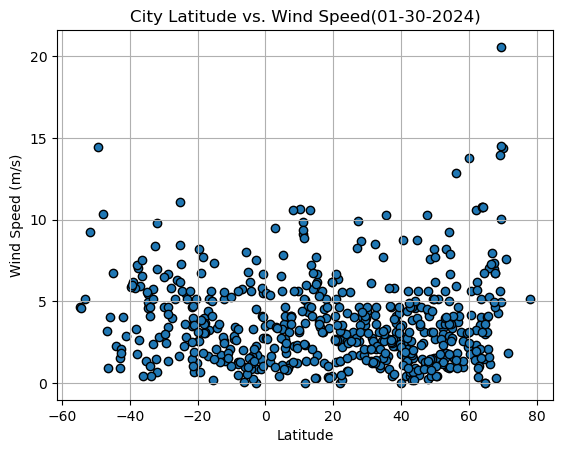

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
#datetime.today() and .strftime functions taken from StackOverflow: https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
from datetime import datetime
date = datetime.today().strftime('%m-%d-%Y')
plt.title(f"City Latitude vs. Wind Speed({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, annotate_x, annotate_y, title, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # xycoords parameter taken from Matplotlib documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
    plt.annotate(line_eq, (annotate_x, annotate_y), xycoords='axes fraction', fontsize=15, color="red")

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,-29.58,100,98,1.13,RU,1706643912
2,college,64.8569,-147.8028,-27.03,66,75,0.00,US,1706643913
6,bethel,41.3712,-73.4140,2.42,67,100,0.45,US,1706643635
7,petukhovo,55.0692,67.9019,-19.94,100,88,3.36,RU,1706643916
11,tahe,52.3333,124.7333,-28.91,98,90,1.75,CN,1706643919


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,14.56,60,50,5.93,SH,1706643913
3,port-aux-francais,-49.3500,70.2167,3.91,73,79,14.47,TF,1706643914
4,west island,-12.1568,96.8225,26.99,78,40,2.57,CC,1706643914
5,puerto natales,-51.7236,-72.4875,17.25,67,100,9.26,CL,1706643915
8,blackmans bay,-43.0167,147.3167,15.07,74,100,0.89,AU,1706643917


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6625921347934899


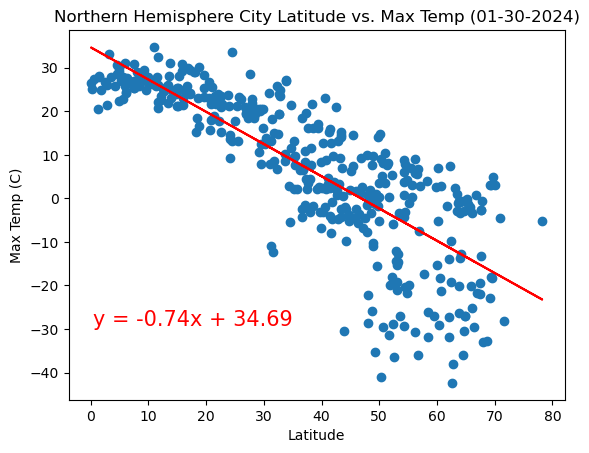

In [15]:
# Linear regression on Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Max Temp ({date})"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 0.05, 0.2, title, x_label, y_label)

The r-value is: 0.28804190189644885


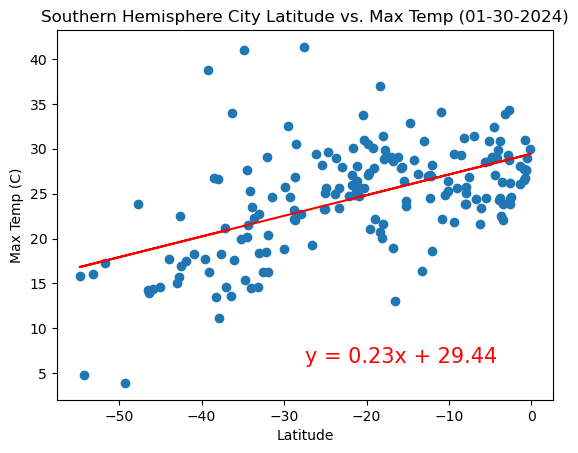

In [16]:
# Linear regression on Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Max Temp ({date})"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 0.5, 0.1, title, x_label, y_label)

**Discussion about the linear relationship:** As expected, the closer you get to the equator, the higher the average max temperature is going to be. There is also a noticeable weaker correlation in the southern hemisphere graphic because the furthest point that humans permanently live is around 55 degrees S whereas in the northern hemisphere the furthest point is close to 80 degress N. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19853696361370662


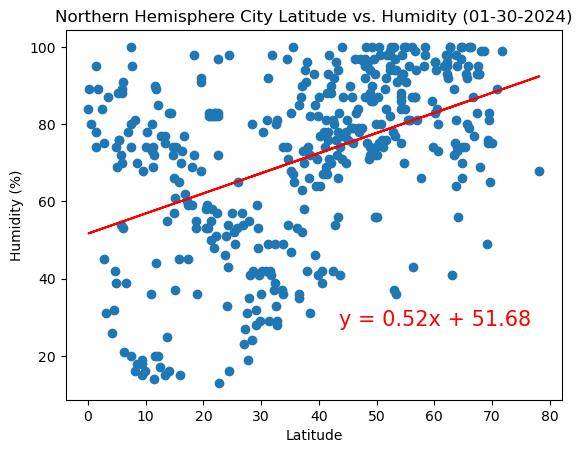

In [17]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Humidity ({date})"
x_label = "Latitude"
y_label = "Humidity (%)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 0.55, 0.2, title, x_label, y_label)

The r-value is: 0.045151557824405913


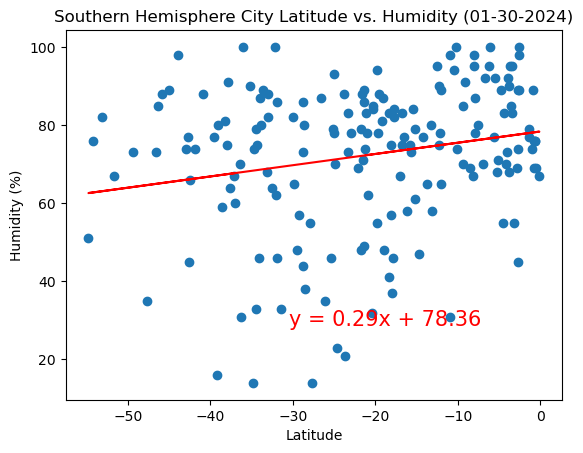

In [18]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Humidity ({date})"
x_label = "Latitude"
y_label = "Humidity (%)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 0.45, 0.2, title, x_label, y_label)

**Discussion about the linear relationship:** There is a noticeable weak correlation in both hemispheres in terms of humidity vs. latitude. This makes sense as humidity is based on a number of variables other than distance from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.018994752797469466


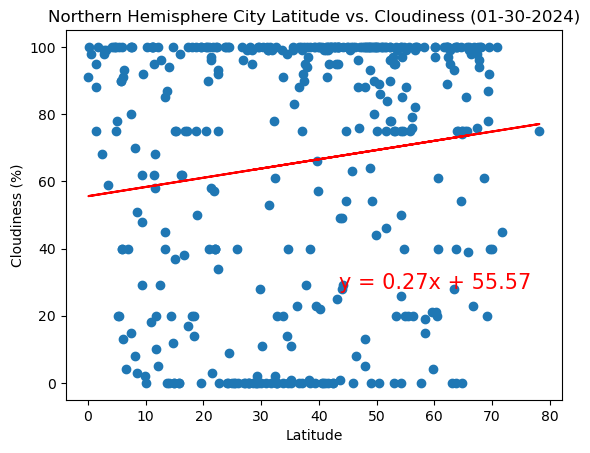

In [19]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Cloudiness ({date})"
x_label = "Latitude"
y_label = "Cloudiness (%)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 0.55, 0.3, title, x_label, y_label)

The r-value is: 0.10194568405571731


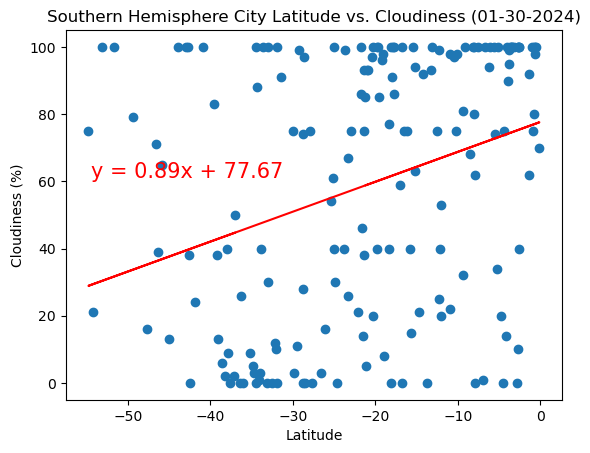

In [20]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Cloudiness ({date})"
x_label = "Latitude"
y_label = "Cloudiness (%)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 0.05, 0.6, title, x_label, y_label)

**Discussion about the linear relationship:** Weak correlation in both the northern and southern hemispheres. Cloudiness is generally more based on weather patterns in the area. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007427569424992034


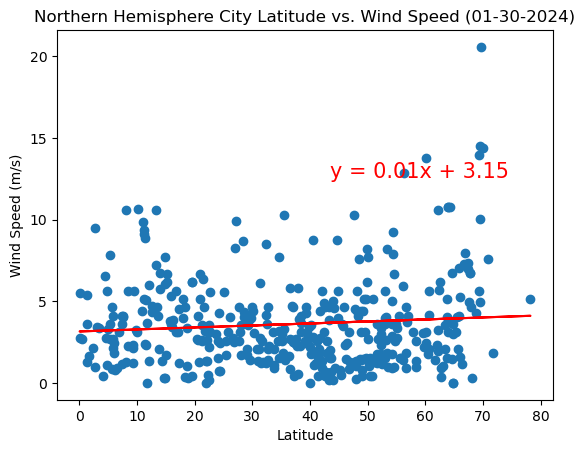

In [21]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Wind Speed ({date})"
x_label = "Latitude"
y_label = "Wind Speed (m/s)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 0.55, 0.6, title, x_label, y_label)

The r-value is: 0.10533061575992198


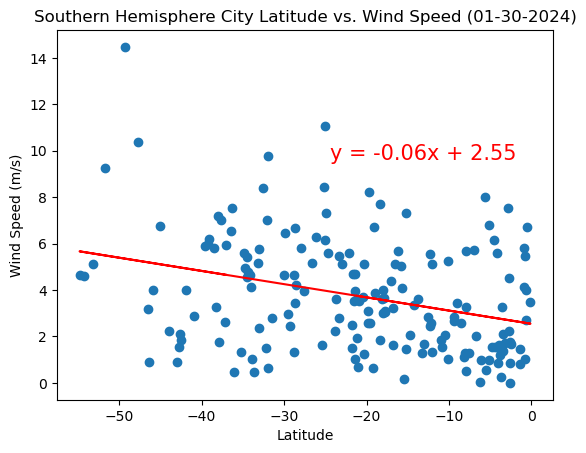

In [22]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Wind Speed ({date})"
x_label = "Latitude"
y_label = "Wind Speed (m/s)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 0.55, 0.65, title, x_label, y_label)

**Discussion about the linear relationship:** There is a very weak correlation between wind speed and latitude in the southern hemisphere. In the northern hemisphere, there is virtually no correlation. 